In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
IMG_SIZE = 224
BATCH_SIZE = 32

In [3]:
train_datagen =ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [4]:
train_generator = train_datagen.flow_from_directory("/content/drive/MyDrive/MAIN",
                                                    target_size=(IMG_SIZE,IMG_SIZE),
                                                    batch_size=BATCH_SIZE,
                                                    class_mode="categorical",
                                                    subset ="training"
)

Found 3200 images belonging to 4 classes.


In [5]:
val_generator = train_datagen.flow_from_directory(
   "/content/drive/MyDrive/MAIN",
                                      target_size=(IMG_SIZE,IMG_SIZE),
                                      batch_size=BATCH_SIZE,
                                      class_mode="categorical",
                                      subset ="validation"
)

Found 800 images belonging to 4 classes.


In [6]:
class_indices=train_generator.class_indices
class_names=list(class_indices.keys())
print("Class indices:",class_indices)
print("Class names:",class_names)

Class indices: {'MILD': 0, 'MODERATE': 1, 'NON-DEMENTED': 2, 'VERY MILD': 3}
Class names: ['MILD', 'MODERATE', 'NON-DEMENTED', 'VERY MILD']


In [18]:
model=keras.Sequential([
    layers.Conv2D(32,(3,3), activation='relu',input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(4, activation='softmax')
])

In [19]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,476 (42.61 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [21]:
model.fit(train_generator,epochs=2, validation_data=val_generator,batch_size=BATCH_SIZE)

Epoch 1/2
100/100 ━━━━━━━━━━━━━━━━━━━━ 528s 5s/step - accuracy: 0.3230 - loss: 1.5881 - val_accuracy: 0.5650 - val_loss: 1.0328
Epoch 2/2
100/100 ━━━━━━━━━━━━━━━━━━━━ 395s 4s/step - accuracy: 0.6092 - loss: 0.9229 - val_accuracy: 0.6475 - val_loss: 0.8223


In [22]:
model.save('/content/drive/MyDrive/MAIN.h5')

In [23]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt #visualization
import numpy as np
model=load_model('/content/drive/MyDrive/MAIN.h5')
print("Model Loaded")

Model Loaded


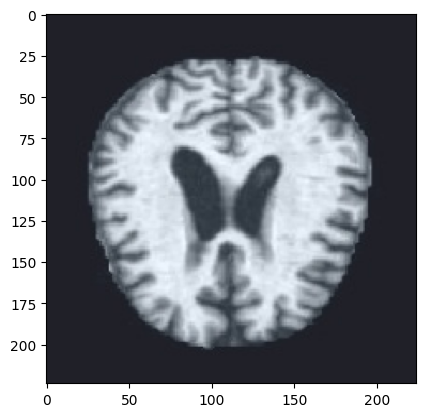

In [24]:
test_image_path='/content/drive/MyDrive/MAIN/MODERATE/003c36ee-8c43-41ce-b5e5-90622644bba5.jpg'
img=image.load_img(test_image_path,target_size=(224,224))
plt.imshow(img)
plt.axis()
plt.show()

In [25]:
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array/=255

In [27]:
prediction=model.predict(img_array)

ind=np.argmax(prediction[0])
print(class_names[ind])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
MODERATE
